<a href="https://colab.research.google.com/github/Omarkouta73/Medical_Cost_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings


#warnings.filterwarnings('ignore')
#plt.style.use('ggplot')

# Explore data

In [5]:
data = pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**bmi:**
* Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**charges:**
* Individual medical costs billed by health insurance

In [7]:
# print first 5 rows of the dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# print last 5 rows of the dataframe
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
# number of rows and columns
data.shape

(1338, 7)

**Check if there are any missing values in the data**

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# getting the statistical measures of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**We have three non numerical features - Sex, Smoker, Region - that need to be encoded.**

# Handle categorical data (Label Encoding)

Explore the **categorical data**, and encode them into numerical data

In [13]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
data["sex"].replace("male", 1, inplace=True)
data["sex"].replace("female", 0, inplace=True)

In [15]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
data["smoker"].replace("yes", 1, inplace=True)
data["smoker"].replace("no", 0, inplace=True)

In [17]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
data["region"].replace("southeast", 1, inplace=True)
data["region"].replace("southwest", 0, inplace=True)
data["region"].replace("northwest", 1, inplace=True)
data["region"].replace("northeast", 0, inplace=True)

In [19]:
# print data after label encoding
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Data Visualization - deeper understanding of the data

In [20]:
correlation = data.corr()

<Axes: >

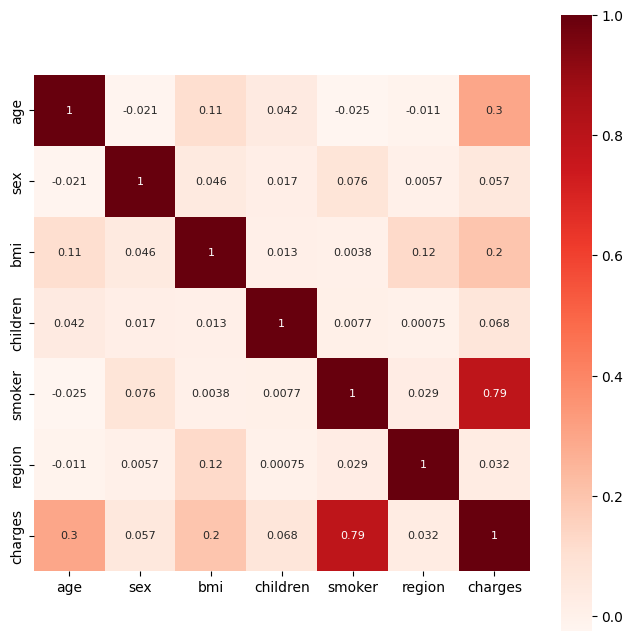

In [21]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True,annot=True, annot_kws={'size':8}, cmap='Reds')

**Highly correlated data**

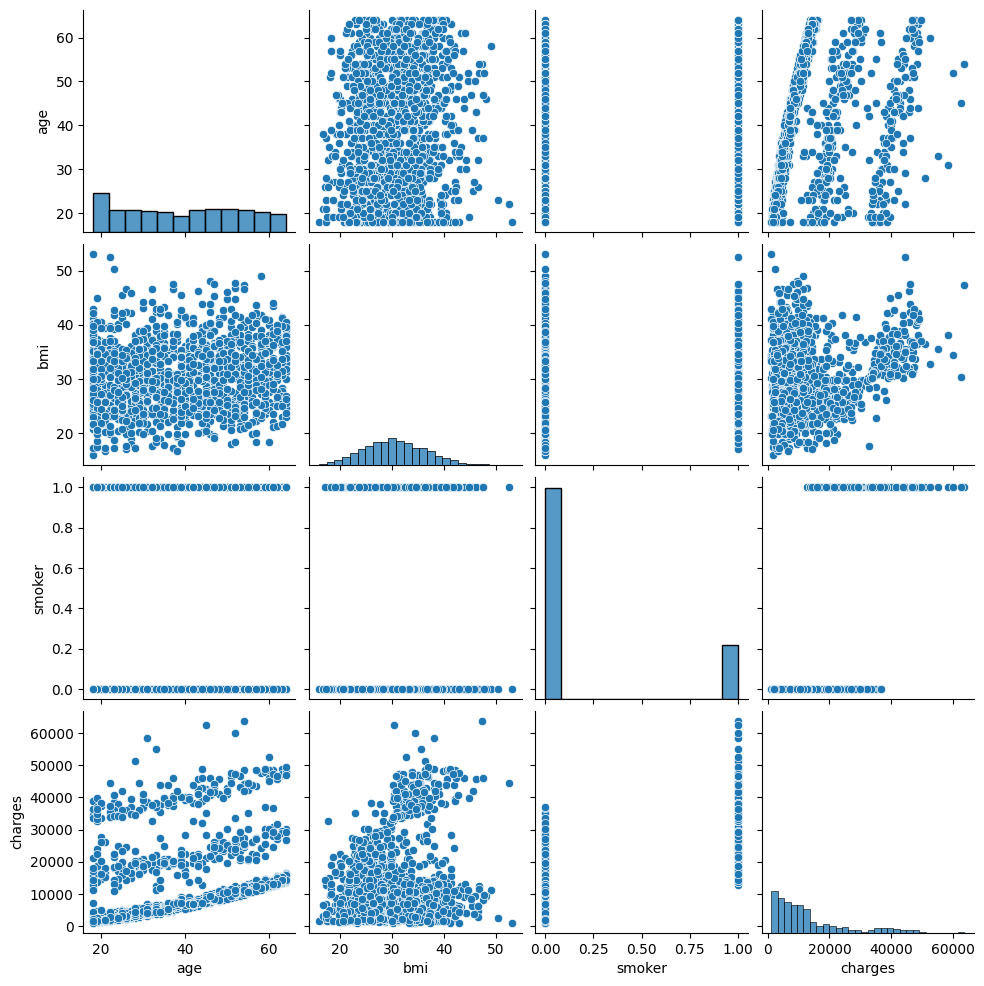

In [22]:
sns.pairplot(data, vars=["age", "bmi", "smoker", "charges"])
plt.show()

**Less correlated data**

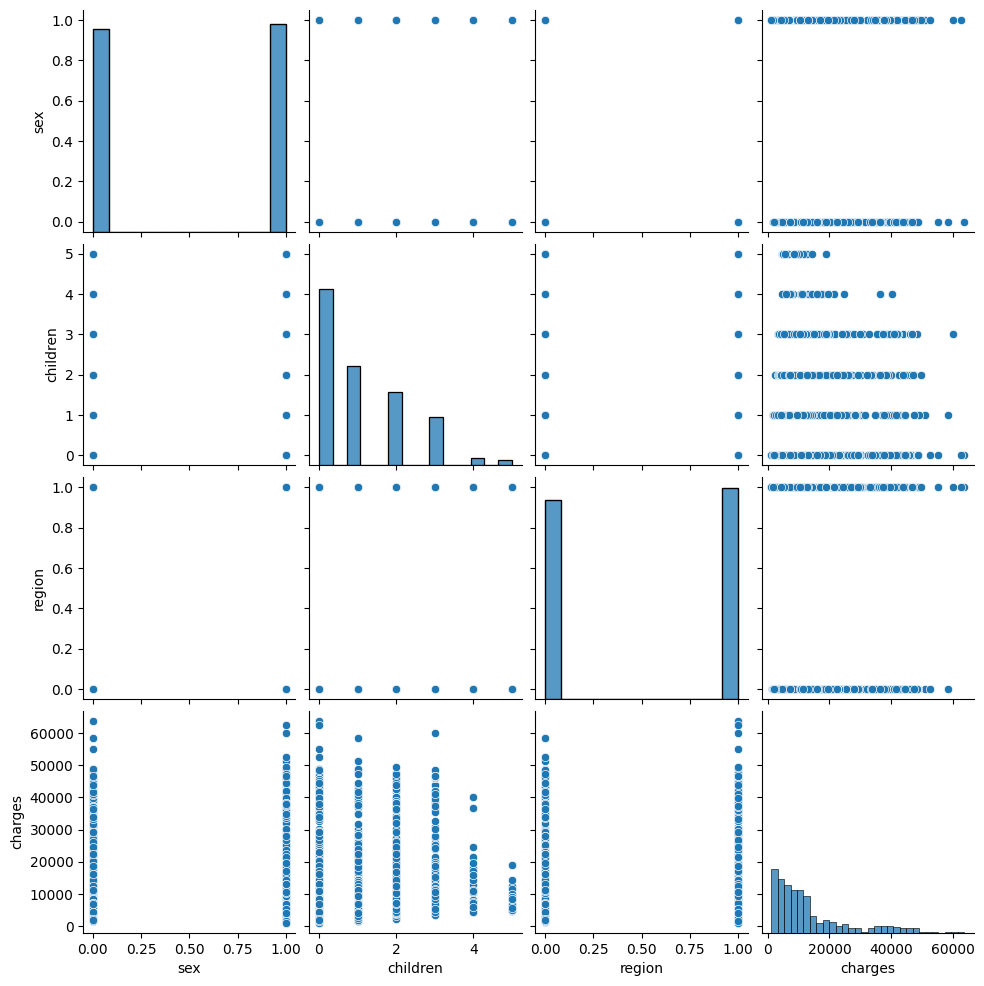

In [23]:
sns.pairplot(data, vars=["sex", "children", "region", "charges"])
plt.show()

<ipython-input-24-edf78b419742>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'],color='green')


<Axes: xlabel='charges', ylabel='Density'>

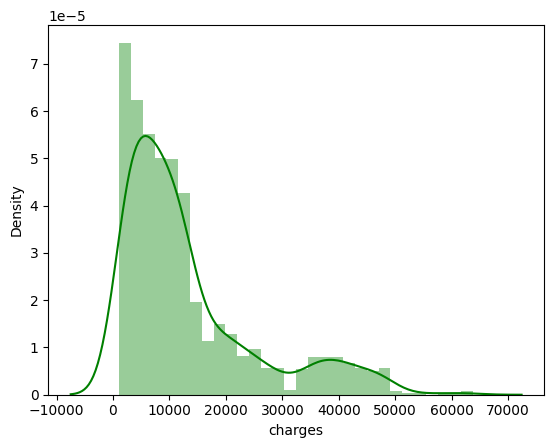

In [24]:
# checking the distribution of the GLD Price
sns.distplot(data['charges'],color='green')

In [25]:
def draw_hist(X):
    fig = plt.figure(figsize=(10,10))
    for i in range(len(X.columns)):
        plt.subplot(4,2,i+1)
        sns.histplot(X[X.columns[i]], bins='auto', color='green')
        plt.tight_layout()
    plt.show()

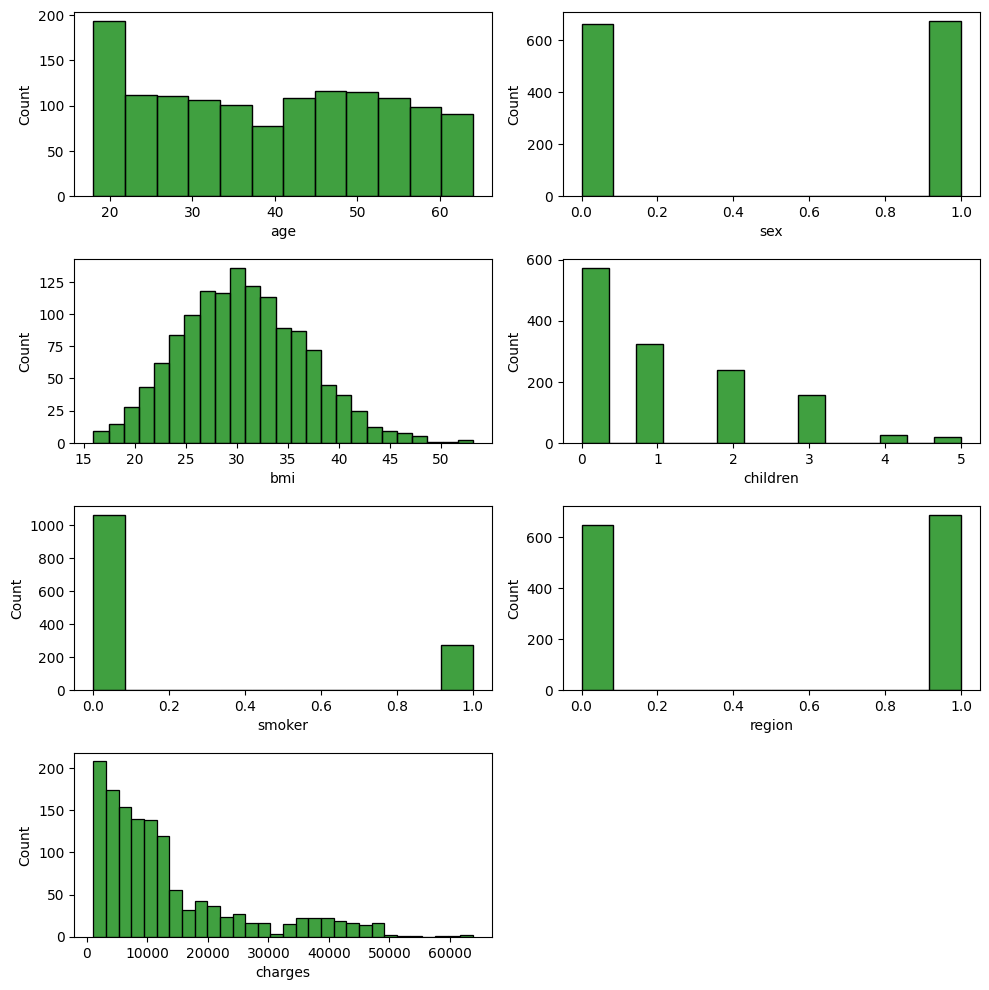

In [26]:
draw_hist(data)

# Define input-output and split data into train-test

In [27]:
#def train_test_split_scratch(X, y, test_size=0.5 ,shuffle=True):
#    if shuffle:
#        X, y = shuffle_data(X, y)
#    if test_size <1 :
#        train_ratio = len(y) - int(len(y) *test_size)
#        X_train, X_test = X[:train_ratio], X[train_ratio:]
#        y_train, y_test = y[:train_ratio], y[train_ratio:]
#        return X_train, X_test, y_train, y_test
#    elif test_size in range(1,len(y)):
#        X_train, X_test = X[test_size:], X[:test_size]
#        y_train, y_test = y[test_size:], y[:test_size]
#        return X_train, X_test, y_train, y_test

In [28]:
X = data.drop(['charges'],axis=1)
Y = data['charges']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [30]:
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


In [31]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [32]:
X_train.head()

,age,sex,bmi,children,smoker,region
216,53,0,26.600,0,0,1
731,53,1,21.400,1,0,0
866,18,1,37.290,0,0,1
202,60,0,24.035,0,0,1
820,45,1,33.700,1,0,0


In [33]:
X_test.head()

,age,sex,bmi,children,smoker,region
559,19,1,35.53,0,0,1
1087,57,1,31.54,0,0,1
1020,51,1,37.00,0,0,0
460,49,0,36.63,3,0,1
802,21,1,22.30,1,0,0
